Introduction 

Résolution du prendule double par la méthode de Runge Kutta 4 
    Le pendule double est un pendule avec un autre pendule attaché à l'extrémité du premier. Le but de l'exercice
    est d'obtenir les positions des deux extrimités au cours du temps en connaissant la position et la vitesse de chaque
    extrémitié à un temps donné (nous posons t=0). 
    Les équations du mouvement sont aux nombres de 4 et ne peuvent pas être résolues analytiquement, nous allons
    donc devoir les approximer à l'aide d'une methode numérique. De plus, le pendule double est un système chaotique,
    cela veut dire qu'il est fort sensibles aux conditions initiales et aux petites perturbations.
    une petite perturbation dx fera diverger les trajectoires comme dxe^(kt)
    Par conséquent, il est difficile de prédire avec précision le mouvement d'un systeme chaotique pour t grand.
    Nos approximations analytiques seront de moins en moins bonne au cours du temps (écart exponentiel) et il se 
    peut que le résultat final que nous obtenons soit en réalité très loin de la réalité.

Exercice 1


Nous devons resoudre un systeme de 4 equations - 4 variables à l'aide de Runge Kutta 4.
pour ce faire nous allons proceder comme à 1 equation mais les coefficients k1, k2, k3, k4 ont maintenant
4 composantes chacun, une pour décrire l'evolution de chaque variable.
Nous évaluerons les 4 variables (angle_1, angle_2, p_angle_1,p_angle_2) à instant t+h utilisant
les dérives correspondantes évalués à l'instant t. Nous supposons que pour un pas suffisament petit, les dérivés varient
peu, de telle manière à ce que f(x+h)=f(x)+h*f'(x)+R avec R << f(x+h).
Nous supposons en particulier que les dérivés sont continues.

Nous allons donc commencer par implementer les dérivés comme des fonctions de (angle_1, angle_2, p_angle_1,p_angle_2),
de telle manière à ce que nous puissions les évaluer à tout moment.

Nous commençons à t=0 avec les conditions initiales.
Nous pouvons alors calculer explicitement les dérivés en t=0
Nous calculons ensuite k1(t=0)
Grâce à k1 nous avons k2
Grâce à k2 nous avons k3 
Grâce à k3 nous avons k4

Nous pouvons donc calculer les variables à l'instant t=0+h
On print ensuite le resultat
Et nous répétons le procédé mais en se servant maintenant des nouvelles valeurs des variables.
Lorsque t=20s nous arretons le calcul. (Le programme peut s'arreter à un temps arbitraire "stop")



In [1]:
import math
import numpy as np
def Double_pendulum_solver_2(stop):
    
    #les conditions initiales
    time=0
    angle_1=math.pi/2 #angle initial du premier pendule
    angle_2=math.pi/2 #angle initial du second pendule
    p_angle_1=0       #moment initial associé au premier angle
    p_angle_2=0       #moment initial associé au second angle                                                                   
        
   
    #on implemente les équations du mouvement : l'expression des dérivés de des angles et des moments associés aux angles. 
    
    a=lambda angle_1, angle_2, p_angle_1, p_angle_2 : 6*(2*p_angle_1-3*math.cos(angle_1-angle_2)*p_angle_2)/(16-9*(math.cos(angle_1-angle_2))**2)
    b=lambda angle_1, angle_2, p_angle_1, p_angle_2 : 6*(8*p_angle_2-3*math.cos(angle_1-angle_2)*p_angle_1)/(16-9*(math.cos(angle_1-angle_2))**2)
    c=lambda angle_1, angle_2, p_angle_1, p_angle_2 : -(1/2)*((6*(2*p_angle_1-3*math.cos(angle_1-angle_2)*p_angle_2)/(16-9*(math.cos(angle_1-angle_2))**2))*(6*(8*p_angle_2-3*math.cos(angle_1-angle_2)*p_angle_1)/(16-9*(math.cos(angle_1-angle_2))**2))*math.sin(angle_1-angle_2)+3*(-9.81)*math.sin(angle_1))
    d=lambda angle_1, angle_2, p_angle_1, p_angle_2 : (1/2)*((6*(2*p_angle_1-3*math.cos(angle_1-angle_2)*p_angle_2)/(16-9*(math.cos(angle_1-angle_2))**2))*(6*(8*p_angle_2-3*math.cos(angle_1-angle_2)*p_angle_1)/(16-9*(math.cos(angle_1-angle_2))**2))*math.sin(angle_1-angle_2)+9.81*math.sin(angle_2))

    while time <= stop:
        
         time=time+0.001
        
        #Puisqu'on a 4 équations, k1, k2, k3, k4 ont 4 composantes
        #"k1=[v,w,x,y]"
        #"k2=[e,f,g,h]"
        #"k3=[m,o,p,q]"
        #"k4=[r,s,t,u]"
        
        #on calcule k1
         v=0.001*a(angle_1,angle_2,p_angle_1,p_angle_2)
         w=0.001*b(angle_1,angle_2,p_angle_1,p_angle_2)    
         x=0.001*c(angle_1,angle_2,p_angle_1,p_angle_2)
         y=0.001*d(angle_1,angle_2,p_angle_1,p_angle_2)    
        
        #on calcule k2
         e=0.001*a(angle_1+v/2, angle_2+w/2, p_angle_1+x/2,p_angle_2+y/2)
         f=0.001*b(angle_1+v/2, angle_2+w/2, p_angle_1+x/2,p_angle_2+y/2)    
         g=0.001*c(angle_1+v/2, angle_2+w/2, p_angle_1+x/2,p_angle_2+y/2)
         h=0.001*d(angle_1+v/2, angle_2+w/2, p_angle_1+x/2,p_angle_2+y/2) 
        
        #on calcule k3
         m=0.001*a(angle_1+e/2, angle_2+f/2, p_angle_1+g/2,p_angle_2+h/2)
         n=0.001*b(angle_1+e/2, angle_2+f/2, p_angle_1+g/2,p_angle_2+h/2)    
         o=0.001*c(angle_1+e/2, angle_2+f/2, p_angle_1+g/2,p_angle_2+h/2)
         p=0.001*d(angle_1+e/2, angle_2+f/2, p_angle_1+g/2,p_angle_2+h/2) 
        
        #on calcule k4
         r=0.001*a(angle_1+m, angle_2+n, p_angle_1+o,p_angle_2+p)
         s=0.001*b(angle_1+m, angle_2+n, p_angle_1+o,p_angle_2+p)    
         t=0.001*c(angle_1+m, angle_2+n, p_angle_1+o,p_angle_2+p)
         u=0.001*d(angle_1+m, angle_2+n, p_angle_1+o,p_angle_2+p) 
        
    
         angle_1=angle_1+(1/6)*(v+2*e+2*m+r)
         angle_2=angle_2+(1/6)*(w+2*f+2*n+s)
         p_angle_1=p_angle_1+(1/6)*(x+2*g+2*o+t)
         p_angle_2=p_angle_2+(1/6)*(y+2*h+2*p+u)
        
         print(time,angle_1,angle_2)
        

In [2]:
Double_pendulum_solver_2(20)

0.001 1.570802633223468 1.5707942246520397
0.002 1.5708215525091758 1.5707879182234836
0.003 1.5708530846519657 1.5707774075093575
0.004 1.5708972296516264 1.5707626925101634
0.005 1.5709539875076075 1.5707437732272076
0.006 1.5710233582187672 1.5707206496632022
0.007 1.5711053417830445 1.5706933218230408
0.008 1.5711999381970612 1.5706617897147455
0.009000000000000001 1.5713071474556501 1.570626053350586
0.010000000000000002 1.5714269695513117 1.5705861127483718
0.011000000000000003 1.5715594044735965 1.5705419679329151
0.012000000000000004 1.5717044522084178 1.5704936189376675
0.013000000000000005 1.571862112737289 1.5704410658065275
0.014000000000000005 1.5720323860364898 1.5703843085958213
0.015000000000000006 1.5722152720761604 1.5703233473764548
0.016000000000000007 1.572410770819322 1.5702581822362385
0.017000000000000008 1.5726188822208258 1.5701888132823838
0.01800000000000001 1.5728396062262286 1.5701152406441725
0.01900000000000001 1.5730729427705976 1.5700374644757966
0.020

0.4950000000000004 2.681215578639541 2.070308493327505
0.4960000000000004 2.6836882275226577 2.076105022242347
0.4970000000000004 2.686148112285356 2.081935355429652
0.4980000000000004 2.6885951171019014 2.087799551836112
0.4990000000000004 2.6910291269471873 2.093697669658198
0.5000000000000003 2.693450027656078 2.0996297662809065
0.5010000000000003 2.6958577059850604 2.105595898212649
0.5020000000000003 2.6982520496762854 2.1115961210161127
0.5030000000000003 2.700632947524096 2.1176304892349203
0.5040000000000003 2.7030002894441223 2.123699056315903
0.5050000000000003 2.705353966545038 2.129801874526801
0.5060000000000003 2.707693871203076 2.1359389948692025
0.5070000000000003 2.7100198971393934 2.142110466986523
0.5080000000000003 2.712331939500388 2.1483163390668216
0.5090000000000003 2.714629894941063 2.154556657740254
0.5100000000000003 2.716913661711543 2.1608314679709477
0.5110000000000003 2.7191831397468427 2.167140812943088
0.5120000000000003 2.7214382307599947 2.17348473394

0.8280000000000006 3.5758610416394414 4.019132803061973
0.8290000000000006 3.5805816518938145 4.019847952092256
0.8300000000000006 3.585309796748013 4.020527309277573
0.8310000000000006 3.590045382650246 4.021171054129181
0.8320000000000006 3.594788314511015 4.021779371859651
0.8330000000000006 3.59953849562626 4.0223524535153965
0.8340000000000006 3.604295827599561 4.022890496110337
0.8350000000000006 3.609060210263473 4.02339370276053
0.8360000000000006 3.6138315416000864 4.023862282819592
0.8370000000000006 3.6186097176609087 4.024296452014708
0.8380000000000006 3.623394632486172 4.024696432583019
0.8390000000000006 3.628186178023682 4.025062453408156
0.8400000000000006 3.6329842440473272 4.025394750156679
0.8410000000000006 3.6377887180753827 4.025693565414155
0.8420000000000006 3.6425994852887413 4.025959148820586
0.8430000000000006 3.647416428449228 4.026191757204907
0.8440000000000006 3.652239427818149 4.026391654718209
0.8450000000000006 3.6570683610752472 4.026559112965382
0.8

1.160999999999983 4.690822713691087 4.227131321840687
1.1619999999999828 4.691731254401763 4.22961917638727
1.1629999999999827 4.692625451521375 4.232113799762334
1.1639999999999826 4.69350530979544 4.234615165071968
1.1649999999999825 4.694370833816441 4.2371232461710715
1.1659999999999824 4.695222028024528 4.239638017660464
1.1669999999999823 4.696058896708259 4.242159454883888
1.1679999999999822 4.6968814440053865 4.244687533924869
1.168999999999982 4.697689673903688 4.247222231603458
1.169999999999982 4.698483590241835 4.24976352547284
1.1709999999999818 4.699263196710322 4.252311393815798
1.1719999999999817 4.700028496852439 4.254865815641047
1.1729999999999816 4.7007794940653 4.2574267706794116
1.1739999999999815 4.70151619160093 4.259994239379869
1.1749999999999814 4.702238592567405 4.262568202905425
1.1759999999999813 4.702946699930061 4.265148643128843
1.1769999999999812 4.70364051651276 4.267735542628205
1.177999999999981 4.704320044999223 4.27032888468231
1.178999999999981 4

1.4939999999999463 4.3071537369942945 5.228635991474529
1.4949999999999461 4.3046279352029755 5.230689045397459
1.495999999999946 4.3020967753477235 5.23272648236914
1.496999999999946 4.299560246486822 5.234748238760765
1.4979999999999458 4.297018337520222 5.236754250729803
1.4989999999999457 4.294471037195822 5.238744454211302
1.4999999999999456 4.291918334115674 5.240718784909416
1.5009999999999455 4.28936021674213 5.242677178289143
1.5019999999999454 4.286796673403933 5.2446195695682825
1.5029999999999453 4.284227692302238 5.246545893709606
1.5039999999999452 4.281653261516587 5.248456085413236
1.504999999999945 4.279073369010824 5.250350079109233
1.505999999999945 4.276488002638959 5.252227808950395
1.5069999999999448 4.273897150150984 5.25408920880525
1.5079999999999447 4.271300799198637 5.25593421225126
1.5089999999999446 4.268698937341128 5.257762752568222
1.5099999999999445 4.2660915520508125 5.259574762731863
1.5109999999999444 4.263478630718831 5.261370175407641
1.51199999999

1.958999999999895 3.1528589309528168 3.2706667109173724
1.959999999999895 3.154893694246704 3.2571385146934912
1.9609999999998948 3.156945919615221 3.2435819281127776
1.9619999999998947 3.1590130147764306 3.2300010732595568
1.9629999999998946 3.1610923196183056 3.216400194767939
1.9639999999998945 3.163181117157919 3.20278364011043
1.9649999999998944 3.1652766453083063 3.189155838372766
1.9659999999998943 3.1673761092992905 3.175521277802346
1.9669999999998942 3.169476694579561 3.1618844824538166
1.967999999999894 3.1715755800130223 3.148249988282541
1.968999999999894 3.1736699511735784 3.134622319053551
1.9699999999998938 3.1757570135395348 3.1210059624392694
1.9709999999998937 3.177834005391835 3.1074053466734974
1.9719999999998936 3.179898210229252 3.093824818112194
1.9729999999998935 3.1819469685279698 3.080268620024301
1.9739999999998934 3.1839776886920252 3.0667408728996133
1.9749999999998933 3.185987857063916 3.0532455565172447
1.9759999999998932 3.187975046890261 3.039786493969

2.3269999999998547 2.3168161180621007 1.0359623496391572
2.3279999999998546 2.313445340619377 1.0361985407518735
2.3289999999998545 2.310079775050607 1.0364614205676375
2.3299999999998544 2.3067194167251968 1.0367508976858613
2.3309999999998543 2.3033642604461964 1.0370668809909873
2.331999999999854 2.300014300458947 1.0374092796630714
2.332999999999854 2.2966695304596736 1.0377780031881585
2.333999999999854 2.293329943604016 1.0381729613684514
2.334999999999854 2.2899955325155044 1.0385940643322689
2.3359999999998537 2.286666289293975 1.0390412225437957
2.3369999999998536 2.2833422055239296 1.0395143468126198
2.3379999999998535 2.2800232722828384 1.0400133483030578
2.3389999999998534 2.276709480149386 1.0405381385432677
2.3399999999998533 2.2734008192116617 1.0410886294341468
2.340999999999853 2.270097279075297 1.0416647332580145
2.341999999999853 2.2667988488715447 1.0422663626870778
2.342999999999853 2.2635055172653114 1.042893430791681
2.343999999999853 2.2602172724631315 1.0435458

2.8029999999998023 1.5506090104081423 2.416972382222925
2.803999999999802 1.5519836083515284 2.4194538309271945
2.804999999999802 1.553372540774456 2.4219289153474235
2.805999999999802 1.5547758138155696 2.4243975723792617
2.806999999999802 1.556193433697153 2.426859738007043
2.8079999999998018 1.557625406724759 2.4293153473036315
2.8089999999998017 1.5590717392869005 2.4317643344302553
2.8099999999998015 1.5605324378548007 2.434206632636316
2.8109999999998014 1.5620075089822079 2.4366421742591853
2.8119999999998013 1.5634969593052703 2.439070890723984
2.812999999999801 1.5650007955424776 2.4414927125433383
2.813999999999801 1.5665190244946652 2.4439075693171244
2.814999999999801 1.5680516530450843 2.4463153897321894
2.815999999999801 1.5695986881595405 2.4487161015620567
2.8169999999998008 1.5711601368865975 2.451109631666613
2.8179999999998007 1.5727360063578504 2.4534959059917747
2.8189999999998006 1.5743263037882689 2.455874849569137
2.8199999999998004 1.5759310364766097 2.45824638

3.159999999999763 2.998731471461806 2.309179539895271
3.160999999999763 3.0038199369226137 2.309483450774626
3.161999999999763 3.0088952414897423 2.3098381994440156
3.1629999999997627 3.0139573975567635 2.31024371973054
3.1639999999997626 3.0190064162009373 2.3106999436360125
3.1649999999997624 3.024042307121766 2.3112068014540297
3.1659999999997623 3.0290650785835234 2.31176422187979
3.1669999999997622 3.0340747373615717 2.3123721321130453
3.167999999999762 3.0390712886922873 2.3130304579545538
3.168999999999762 3.0440547362264243 2.3137391238963794
3.169999999999762 3.0490250819857567 2.314498053206382
3.170999999999762 3.0539823263228376 2.31530716800722
3.1719999999997617 3.05892646788373 2.316166389350176
3.1729999999997616 3.0638575035735665 2.317075637284102
3.1739999999997615 3.068775428524798 2.3180348309197703
3.1749999999997613 3.073680236068009 2.3190438884899036
3.1759999999997612 3.0785719177051685 2.320102727405143
3.176999999999761 3.0834504630852013 2.321211264306204
3

3.632999999999711 4.002309455474683 5.246551041553271
3.633999999999711 4.0046099278734 5.250189816068746
3.6349999999997107 4.0069090310302515 5.25380909129786
3.6359999999997106 4.009206682981309 5.257408937045339
3.6369999999997105 4.011502802363854 5.260989423171629
3.6379999999997104 4.013797308414147 5.264550619595194
3.6389999999997102 4.0160901209651705 5.268092596294646
3.63999999999971 4.018381160444348 5.27161542331072
3.64099999999971 4.020670347871245 5.275119170748097
3.64199999999971 4.02295760485524 5.278603908777069
3.64299999999971 4.025242853593181 5.282069707635066
3.6439999999997097 4.027526016867013 5.285516637628027
3.6449999999997096 4.029807018041387 5.2889447691316365
3.6459999999997095 4.032085781061245 5.2923541725924155
3.6469999999997094 4.034362230449388 5.295744918528683
3.6479999999997093 4.036636291304014 5.299117077531377
3.648999999999709 4.038907889296245 5.302470720264746
3.649999999999709 4.041176950667626 5.305805917466919
3.650999999999709 4.043

3.9929999999996713 4.3972338631645185 5.798215982699678
3.993999999999671 4.39666124803807 5.798607600254424
3.994999999999671 4.396078500296126 5.7989944237192
3.995999999999671 4.3954856205569195 5.799376425902254
3.996999999999671 4.394882609485511 5.799753579149883
3.9979999999996707 4.394269467793505 5.800125855346718
3.9989999999996706 4.393646196238777 5.800493225916037
3.9999999999996705 4.393012795625208 5.800855661820068
4.000999999999671 4.3923692668024295 5.801213133560308
4.001999999999671 4.391715610665571 5.801565611177849
4.0029999999996715 4.391051828155026 5.801913064253709
4.003999999999672 4.39037792025622 5.802255461909177
4.004999999999672 4.389693887999385 5.802592772806158
4.0059999999996725 4.388999732459357 5.802924965147532
4.006999999999673 4.388295454755365 5.803252006677515
4.007999999999673 4.387581056050845 5.803573864682037
4.0089999999996735 4.386856537553255 5.80389050598912
4.009999999999674 4.386121900513905 5.804201896969264
4.010999999999674 4.385

4.492999999999835 3.349368387743858 4.127970333865012
4.4939999999998355 3.34923956795937 4.117974232697568
4.494999999999836 3.3491490972127846 4.107924579879588
4.495999999999836 3.3490973035374543 4.09782071287725
4.4969999999998365 3.3490845132291884 4.087661963325801
4.497999999999837 3.3491110502834918 4.07744765787708
4.498999999999837 3.3491772357750755 4.067177119150583
4.4999999999998375 3.349283387175019 4.056849666796901
4.500999999999838 3.3494298176006674 4.046464618682936
4.501999999999838 3.349616834993095 4.036021292208857
4.5029999999998385 3.349844741216677 4.025519005767324
4.503999999999839 3.3501138310750744 4.01495708035606
4.504999999999839 3.350424391237672 4.004334841355373
4.5059999999998395 3.350776699070297 3.993651620482713
4.50699999999984 3.351171021363865 3.98290675793682
4.50799999999984 3.351607612954426 3.972099604744346
4.5089999999998405 3.3520867152280167 3.9612295253221497
4.509999999999841 3.3526085545036666 3.9502959002685922
4.510999999999841 

4.993000000000002 2.0375134641005346 1.8595670305481227
4.994000000000002 2.032582786074326 1.864897107654396
4.995000000000003 2.0276535194518748 1.8702452650166486
4.996000000000003 2.022726236943558 1.8756102540112405
4.997000000000003 2.0178015249668517 1.8809908008526512
4.998000000000004 2.012879982645638 1.8863856086033304
4.999000000000004 2.007962220730929 1.8917933593374208
5.000000000000004 2.0030488604474836 1.8972127164494033
5.001000000000005 1.9981405322716677 1.9026423270970103
5.002000000000005 1.993237874646737 1.90808082476611
5.003000000000005 1.9883415326425056 1.9135268319437275
5.004000000000006 1.9834521565670742 1.9189789628839604
5.005000000000006 1.97857040053893 1.9244358264503016
5.0060000000000064 1.9736969210282687 1.9298960290168201
5.007000000000007 1.968832375376823 1.9353581774098034
5.008000000000007 1.9639774203057994 1.9408208818708454
5.0090000000000074 1.9591327104217178 1.9462827590219858
5.010000000000008 1.9542988967300223 1.9517424348133865
5

5.493000000000169 1.55169889749602 3.386033140447879
5.494000000000169 1.554214761668658 3.388634748950841
5.49500000000017 1.5567433373050306 3.3912285148357633
5.49600000000017 1.5592845960909756 3.393814298409746
5.49700000000017 1.5618385094303782 3.3963919593176466
5.498000000000171 1.5644050484493368 3.398961356549554
5.499000000000171 1.5669841840004517 3.4015223484483608
5.500000000000171 1.5695758866672374 3.404074792717433
5.501000000000172 1.5721801267686586 3.4066185464283696
5.502000000000172 1.5747968743637906 3.4091534660288563
5.503000000000172 1.577426099256604 3.4116794073506083
5.504000000000173 1.580067771000875 3.414196225617401
5.505000000000173 1.5827218589052203 3.4167037754531875
5.506000000000173 1.5853883320382587 3.419201910890296
5.507000000000174 1.5880671592338982 3.421690485377715
5.508000000000174 1.59075830909675 3.4241693517894523
5.509000000000174 1.5934617500076684 3.4266383624329744
5.510000000000175 1.596177450129418 3.4290973690577173
5.511000000

5.966000000000327 3.893013459846562 2.324422051314774
5.967000000000327 3.897585928656336 2.325365930305609
5.968000000000328 3.9021504995697804 2.3263518203118596
5.969000000000328 3.906707161092449 2.327379560322697
5.970000000000328 3.911255899553172 2.3284489889679647
5.971000000000329 3.9157966991297055 2.3295599444778095
5.972000000000329 3.9203295418742714 2.3307122646437897
5.973000000000329 3.924854407738999 2.331905786781434
5.97400000000033 3.9293712746012757 2.3331403476942434
5.97500000000033 3.9338801182890264 2.334415783639118
5.97600000000033 3.938380912605924 2.3357319302931927
5.977000000000331 3.9428736293565465 2.337088622722071
5.978000000000331 3.947358238371487 2.3384856953494353
5.979000000000331 3.95183470753243 2.339922981928028
5.980000000000332 3.9563030027971995 2.3414003155119807
5.981000000000332 3.960763088224787 2.342917528430485
5.982000000000332 3.965214926000369 2.3444744522627836
5.983000000000333 3.9696584764603204 2.3460709178144734
5.984000000000

6.326000000000447 4.469080280406028 4.156775451454627
6.327000000000448 4.466080702009685 4.165449781343974
6.328000000000448 4.463048175038973 4.174162788404158
6.329000000000448 4.459983100136615 4.182913930498246
6.330000000000449 4.45688591729319 4.191702591445022
6.331000000000449 4.453757107016892 4.200528078663512
6.332000000000449 4.45059719137823 4.209389621050426
6.33300000000045 4.447406734909635 4.218286367129324
6.33400000000045 4.444186345339597 4.227217383511012
6.33500000000045 4.4409366741409615 4.236181653704701
6.336000000000451 4.437658416873397 4.2451780773188945
6.337000000000451 4.434352313300761 4.254205469689541
6.338000000000451 4.431019147265307 4.263262561970796
6.339000000000452 4.427659746302307 4.272348001720611
6.340000000000452 4.424274980980772 4.281460354009381
6.341000000000452 4.42086576395851 4.290598103074932
6.342000000000453 4.417433048742827 4.299759654541356
6.343000000000453 4.413977828151574 4.308943338212538
6.344000000000453 4.410501132473

6.826000000000614 2.8478102751680785 5.782365099426607
6.827000000000615 2.842970302383492 5.779189331163574
6.828000000000615 2.8381276860337805 5.775995404817579
6.829000000000615 2.8332825430306205 5.772783498839589
6.830000000000616 2.828434990034705 5.769553791236183
6.831000000000616 2.823585143442657 5.766306459542152
6.832000000000616 2.818733119374234 5.7630416807936795
6.833000000000617 2.8138790336598225 5.759759631502107
6.834000000000617 2.8090230018282187 5.75646048762828
6.835000000000617 2.804165139094696 5.753144424557468
6.836000000000618 2.7993055603493575 5.749811617074872
6.837000000000618 2.794444380145771 5.746462239341704
6.838000000000618 2.7895817126898836 5.743096464871839
6.839000000000619 2.7847176718292155 5.739714466509044
6.840000000000619 2.7798523710423284 5.736316416404774
6.841000000000619 2.7749859234285696 5.732902485996537
6.84200000000062 2.7701184416980857 5.7294728459868205
6.84300000000062 2.765250038162107 5.726027666322578
6.84400000000062 2

7.326000000000781 1.4665769503819266 3.7869745025605686
7.3270000000007816 1.467281146620674 3.784099148313363
7.328000000000782 1.4680000059324838 3.7812293472434395
7.329000000000782 1.4687335035275195 3.77836502486651
7.330000000000783 1.4694816146325103 3.775506105993389
7.331000000000783 1.4702443144964208 3.7726525147343795
7.332000000000783 1.4710215783961158 3.7698041745036153
7.333000000000784 1.4718133816420187 3.7669610080233555
7.334000000000784 1.4726196995837622 3.7641229373282243
7.335000000000784 1.473440507615833 3.7612898837694027
7.336000000000785 1.4742757811832106 3.758461768018763
7.337000000000785 1.4751254957869977 3.755638510072949
7.338000000000785 1.4759896269900468 3.752820029257396
7.339000000000786 1.4768681504225778 3.7500062442302906
7.340000000000786 1.4777610417877918 3.74719707298647
7.341000000000786 1.4786682768674775 3.7443924328612557
7.342000000000787 1.4795898315276126 3.74159224053422
7.343000000000787 1.4805256817239592 3.738796412032887
7.344

7.814000000000944 3.421490645835572 1.668991281771406
7.8150000000009445 3.426204667295239 1.669596506900816
7.816000000000945 3.4309187287380394 1.6702491458220048
7.817000000000945 3.4356328266650054 1.6709491720853327
7.8180000000009455 3.440346955000141 1.6716965580730736
7.819000000000946 3.4450611050923183 1.6724912749375722
7.820000000000946 3.449775265717279 1.673333292540427
7.8210000000009465 3.4544894230797616 1.6742225793927095
7.822000000000947 3.459203560815763 1.6751591025962282
7.823000000000947 3.463917659994965 1.6761428277858461
7.8240000000009475 3.4686316991233275 1.677173719072862
7.825000000000948 3.4733456541458803 1.6782517389894671
7.826000000000948 3.478059498449716 1.6793768484342868
7.8270000000009485 3.4827732028672114 1.6805490066190154
7.828000000000949 3.4874867356794828 1.6817681710161592
7.829000000000949 3.4922000626200993 1.6830342973078944
7.8300000000009495 3.4969131468790637 1.6843473393360546
7.83100000000095 3.5016259491070763 1.685707249053253

8.325000000000825 3.7519066728452124 5.3569507301374495
8.326000000000825 3.7506944214615556 5.363862783475772
8.327000000000824 3.749493512782149 5.370761674293426
8.328000000000824 3.7483038480257633 5.3776476360698915
8.329000000000823 3.7471253300376177 5.384520899382248
8.330000000000823 3.7459578632590746 5.391381691974022
8.331000000000822 3.744801353698029 5.398230238822432
8.332000000000821 3.743655708899976 5.405066762204065
8.33300000000082 3.742520837919741 5.411891481759034
8.33400000000082 3.741396651293852 5.418704614553642
8.33500000000082 3.740283061013542 5.42550637514159
8.33600000000082 3.739179980498359 5.432296975623777
8.337000000000819 3.7380873245703747 5.4390766257067025
8.338000000000818 3.737005009428972 5.445845532759529
8.339000000000818 3.735932952626193 5.452603901869823
8.340000000000817 3.7348710730426387 5.459351935898006
8.341000000000816 3.7338192908638987 5.466089835530555
8.342000000000816 3.7327775275575026 5.472817799331972
8.343000000000815 3.7

8.825000000000548 2.964730000436488 8.979187517002595
8.826000000000548 2.9575303623344715 8.993527879501402
8.827000000000547 2.950275152231991 9.00797437673167
8.828000000000547 2.942968000903889 9.022520538928712
8.829000000000546 2.935612940292497 9.037159133072995
8.830000000000545 2.928214396467389 9.051882175536479
8.831000000000545 2.9207771748629527 9.066680959613464
8.832000000000544 2.9133064373454864 9.0815460988208
8.833000000000544 2.9058076709543474 9.096467586284318
8.834000000000543 2.8982866485050733 9.111434869861457
8.835000000000543 2.8907493816168026 9.126436941921934
8.836000000000542 2.88320206710607 9.141462441969193
8.837000000000542 2.875651028044439 9.156499769593301
8.838000000000541 2.8681026510779817 9.171537204660467
8.83900000000054 2.8605633218247783 9.186563031219194
8.84000000000054 2.853039360281542 9.201565661379295
8.84100000000054 2.84553695817079 9.21653375541956
8.842000000000539 2.8380621200456733 9.231456334602951
8.843000000000538 2.83062060

9.325000000000271 2.7747464303073412 13.518934005835622
9.32600000000027 2.774966289759139 13.527093933206858
9.32700000000027 2.775166305320525 13.53525881048186
9.32800000000027 2.775346406076846 13.543428900121386
9.329000000000269 2.775506519628568 13.551604467213915
9.330000000000268 2.7756465720562926 13.559785779544207
9.331000000000268 2.7757664878850425 13.567973107663745
9.332000000000267 2.7758661900478026 13.576166724963114
9.333000000000267 2.7759455998482707 13.584366907746361
9.334000000000266 2.7760046369228033 13.592573935307396
9.335000000000266 2.7760432192015188 13.600788090008487
9.336000000000265 2.776061262868532 13.609009657360911
9.337000000000264 2.776058682321286 13.617238926107806
9.338000000000264 2.7760353901289516 13.625476188309309
9.339000000000263 2.7759912969898632 13.633721739430028
9.340000000000263 2.775926311687955 13.641975878428921
9.341000000000262 2.7758403410481653 13.650238907851644
9.342000000000262 2.7757332898907734 13.658511133925451
9.3

9.824999999999994 3.173850689918893 17.765084834810903
9.825999999999993 3.1783839866495436 17.767009416605223
9.826999999999993 3.182910740227716 17.768889023052807
9.827999999999992 3.1874308924745227 17.770723697641706
9.828999999999992 3.1919443875431384 17.772513486367274
9.829999999999991 3.1964511719072957 17.774258437689706
9.83099999999999 3.200951194349405 17.775958602490977
9.83199999999999 3.205444405948315 17.777614034031206
9.83299999999999 3.2099307600667206 17.77922478790447
9.833999999999989 3.2144102123382337 17.780790921994093
9.834999999999988 3.2188827206541246 17.7823124964274
9.835999999999988 3.223348245149749 17.783789573530004
9.836999999999987 3.227806748190671 17.785222217779587
9.837999999999987 3.232258194358491 17.786610495759252
9.838999999999986 3.2367025504363975 17.78795447611043
9.839999999999986 3.2411397853944472 17.789254229485365
9.840999999999985 3.2455698703745886 17.79050982849921
9.841999999999985 3.2499927786754426 17.791721347681737
9.84299

10.324999999999717 4.760080254932647 15.481579887062386
10.325999999999716 4.7594090943253375 15.47653493754094
10.326999999999716 4.758717263351299 15.471485510803744
10.327999999999715 4.758004747391148 15.466431583556018
10.328999999999715 4.757271532036134 15.46137313417779
10.329999999999714 4.756517603102419 15.456310142729658
10.330999999999714 4.7557429466453565 15.45124259095864
10.331999999999713 4.7549475489737585 15.446170462304162
10.332999999999712 4.75413139666416 15.441093741904117
10.333999999999712 4.753294476575071 15.436012416601047
10.334999999999711 4.752436775861222 15.430926474948397
10.33599999999971 4.7515582819877915 15.425835907216854
10.33699999999971 4.750658982744628 15.420740705400771
10.33799999999971 4.749738866260455 15.415640863224649
10.338999999999709 4.748797921017054 15.41053637614969
10.339999999999709 4.747836135863438 15.4054272413804
10.340999999999708 4.746853500029998 15.400313457871253
10.341999999999707 4.74585000314263 15.395195026333386

10.82399999999944 2.84231441885218 14.967246332889127
10.82499999999944 2.8353053880401395 14.97761649369328
10.82599999999944 2.828245242050732 14.988096888872882
10.826999999999439 2.821134382733631 14.998686626762185
10.827999999999438 2.8139733702339926 15.009384512253058
10.828999999999438 2.8067629356644495 15.020189022122922
10.829999999999437 2.7995039935699975 15.031098280744422
10.830999999999436 2.792197653926113 15.042110036682551
10.831999999999436 2.7848452333726526 15.053221640759155
10.832999999999435 2.7774482653511567 15.06443002623352
10.833999999999435 2.770008508783672 15.075731691806048
10.834999999999434 2.762527954909944 15.087122688194123
10.835999999999434 2.755008831889976 15.098598609049255
10.836999999999433 2.74745360678356 15.11015458697612
10.837999999999433 2.7398649845403944 15.121785295371685
10.838999999999432 2.7322459036760525 15.133484956721595
10.839999999999431 2.7245995283717384 15.14524735786877
10.84099999999943 2.7169292368195577 15.15706587

11.323999999999163 1.7869148563427153 17.58346850911464
11.324999999999163 1.788754565996413 17.58824938657914
11.325999999999162 1.7906054280464474 17.593033373639933
11.326999999999162 1.7924674046590556 17.597820451591797
11.327999999999161 1.7943404583591978 17.60261060283186
11.32899999999916 1.7962245520313436 17.607403810862447
11.32999999999916 1.7981196489200097 17.612200060293475
11.33099999999916 1.8000257126300516 17.616999336844408
11.331999999999159 1.8019427071267122 17.621801627345786
11.332999999999158 1.8038705967354325 17.626606919740333
11.333999999999158 1.8058093461414266 17.631415203083638
11.334999999999157 1.8077589203890267 17.636226467544446
11.335999999999157 1.8097192848808 17.641040704404542
11.336999999999156 1.8116904053764427 17.645857906058243
11.337999999999155 1.8136722479914555 17.65067806601151
11.338999999999155 1.815664779195604 17.655501178880684
11.339999999999154 1.8176679658111672 17.660327240390878
11.340999999999154 1.819681775010981 17.665

11.823999999998886 2.9777940934015987 21.057342625313026
11.824999999998886 2.975983884810051 21.069076130047314
11.825999999998885 2.9741196048870533 21.080883822705044
11.826999999998884 2.972200692677646 21.09276712769533
11.827999999998884 2.970226591942457 21.104727474014975
11.828999999998883 2.968196753326982 21.11676629161982
11.829999999998883 2.966110636799958 21.128885007298503
11.830999999998882 2.9639677143859355 21.14108503999986
11.831999999998882 2.9617674732184796 21.153367795562318
11.832999999998881 2.9595094189416367 21.165734660790957
11.83399999999888 2.9571930794882344 21.17818699682593
11.83499999999888 2.9548180092642053 21.190726131744224
11.83599999999888 2.952383793768283 21.203353352336087
11.836999999998879 2.949890054676019 21.21606989499769
11.837999999998878 2.9473364554159134 21.228876935683388
11.838999999998878 2.9447227072633884 21.24177557886418
11.839999999998877 2.9420485759751753 21.25476684544462
11.840999999998877 2.939313888982135 21.26785165

12.323999999998609 3.95737470984346 24.292059052794418
12.324999999998608 3.9604996947392723 24.29026676239226
12.325999999998608 3.9636186738980936 24.288449745002847
12.326999999998607 3.966731699434245 24.286608082067577
12.327999999998607 3.969838823756086 24.28474185389108
12.328999999998606 3.972940099562597 24.28285113963257
12.329999999998606 3.976035579840095 24.280936017297332
12.330999999998605 3.979125317859083 24.27899656372838
12.331999999998605 3.9822093671712335 24.277032854598225
12.332999999998604 3.9852877816064995 24.275044964400802
12.333999999998603 3.988360615270353 24.273032966443527
12.334999999998603 3.9914279225411504 24.27099693283949
12.335999999998602 3.994489758067622 24.268936934499777
12.336999999998602 3.9975461767664817 24.266853041125906
12.337999999998601 4.000597233820157 24.264745321202415
12.3389999999986 4.003642984674636 24.26261384198955
12.3399999999986 4.006683485037432 24.260458669516076
12.3409999999986 4.009718790875655 24.25827986857223


12.823999999998332 4.573421626918255 22.14137325483511
12.824999999998331 4.570906606872785 22.138288862216537
12.82599999999833 4.5683757894630235 22.13521820975784
12.82699999999833 4.565829196406106 22.132161437030472
12.82799999999833 4.563266849525008 22.129118684591017
12.828999999998329 4.5606887707430035 22.12609009397476
12.829999999998329 4.558094982077937 22.123075807689222
12.830999999998328 4.555485505636313 22.120075969207694
12.831999999998327 4.552860363607192 22.117090722962782
12.832999999998327 4.550219578255895 22.114120214339952
12.833999999998326 4.54756317191752 22.111164589671063
12.834999999998326 4.544891166990268 22.10822399622794
12.835999999998325 4.542203585928572 22.105298582215948
12.836999999998325 4.539500451236036 22.10238849676757
12.837999999998324 4.536781785458175 22.099493889936035
12.838999999998324 4.5340476111749615 22.09661491268896
12.839999999998323 4.531297950993173 22.093751716902023
12.840999999998322 4.528532827538545 22.09090445535267


13.323999999998055 2.1938941156102345 22.171308901412427
13.324999999998054 2.191306066434736 22.165468895549147
13.325999999998054 2.1887430793340283 22.159601138692388
13.326999999998053 2.1862052802614023 22.153705710073798
13.327999999998053 2.1836927951962326 22.14778268556195
13.328999999998052 2.181205750149718 22.14183213760365
13.329999999998051 2.178744271171294 22.135854135164923
13.33099999999805 2.1763084843557197 22.129848743671705
13.33199999999805 2.173898515850838 22.12381602495022
13.33299999999805 2.1715144918659997 22.117756037167048
13.33399999999805 2.169156538681155 22.111668834768878
13.334999999998049 2.166824782656601 22.10555446842197
13.335999999998048 2.1645193502433866 22.099412984951307
13.336999999998048 2.16224036799436 22.093244427279433
13.337999999998047 2.1599879625758613 22.087048834365017
13.338999999998046 2.1577622607800433 22.080826241141107
13.339999999998046 2.155563389537818 22.074576678453095
13.340999999998045 2.153391475932415 22.06830017

13.822999999997778 2.216709276229522 18.622865664943713
13.823999999997778 2.2163014371942 18.61749446563052
13.824999999997777 2.215895052022827 18.61212171843258
13.825999999997777 2.2154901468936545 18.606747381599348
13.826999999997776 2.2150867481643917 18.601371413869312
13.827999999997775 2.2146848823820293 18.59599377448402
13.828999999997775 2.214284576292842 18.590614423202442
13.829999999997774 2.213885856852574 18.585233320315744
13.830999999997774 2.2134887512368056 18.579850426662386
13.831999999997773 2.213093286851505 18.57446570364362
13.832999999997773 2.212699491343764 18.569079113239365
13.833999999997772 2.212307392612722 18.563690618024438
13.834999999997772 2.2119170188206723 18.558300181185192
13.835999999997771 2.2115283984043597 18.552907766536517
13.83699999999777 2.211141560086463 18.547513338539233
13.83799999999777 2.210756532887265 18.54211686231785
13.83899999999777 2.2103733461365103 18.536718303678757
13.839999999997769 2.209992029485451 18.53131762912

14.322999999997501 3.431970195198841 15.156309171428873
14.3239999999975 3.437449863876748 15.146539990623358
14.3249999999975 3.4428765493238984 15.136864384261777
14.3259999999975 3.448251237874829 15.127280390466213
14.326999999997499 3.453574898679141 15.117786083505774
14.327999999997498 3.458848482881982 15.10837957515334
14.328999999997498 3.4640729229917797 15.099059015692319
14.329999999997497 3.4692491324108015 15.089822594620253
14.330999999997497 3.4743780051068685 15.08066854109075
14.331999999997496 3.4794604154070212 15.071595124130429
14.332999999997496 3.484497217896172 15.062600652663225
14.333999999997495 3.489489247405766 15.053683475370505
14.334999999997494 3.494437319079266 15.044841980412057
14.335999999997494 3.499342228502862 15.036074595029868
14.336999999997493 3.504204751891221 15.027379785053926
14.337999999997493 3.5090256463193628 15.018756054326841
14.338999999997492 3.5138056499928463 15.010201944061933
14.339999999997492 3.518545482549452 15.001716032

14.822999999997224 4.041667450408716 12.352191266818387
14.823999999997223 4.041256020876011 12.34686621637693
14.824999999997223 4.040845004230382 12.341538003839254
14.825999999997222 4.040434433373777 12.336206571240638
14.826999999997222 4.040024341437957 12.330871860407267
14.827999999997221 4.039614761786924 12.325533812953015
14.82899999999722 4.0392057280193425 12.320192370276107
14.82999999999722 4.0387972739709594 12.314847473555698
14.83099999999722 4.03838943371702 12.309499063748348
14.831999999997219 4.03798224157469 12.304147081584388
14.832999999997218 4.037575732105474 12.298791467564197
14.833999999997218 4.037169940117638 12.293432161954371
14.834999999997217 4.036764900668636 12.288069104783792
14.835999999997217 4.03636064906754 12.2827022358396
14.836999999997216 4.035957220877479 12.277331494663061
14.837999999997216 4.035554651918075 12.271956820545325
14.838999999997215 4.035152978267904 12.266578152523099
14.839999999997215 4.034752236266944 12.261195429374196

15.322999999996947 3.80659756206494 8.902257268973699
15.323999999996946 3.8023572137847834 8.899270559107599
15.324999999996946 3.7981012279008235 8.89632512369619
15.325999999996945 3.793829681749304 8.893421156223171
15.326999999996945 3.789542651091303 8.890558850338232
15.327999999996944 3.78524021008049 8.887738399855396
15.328999999996944 3.7809224312307155 8.884959998752615
15.329999999996943 3.7765893853834434 8.882223841172637
15.330999999996942 3.7722411416750217 8.879530121425159
15.331999999996942 3.767877767503797 8.876879033990281
15.332999999996941 3.7634993284970704 8.874270773523277
15.33399999999694 3.759105888477903 8.871705534860684
15.33499999999694 3.7546975094317636 8.86918351302775
15.33599999999694 3.7502742514730243 8.866704903247218
15.336999999996939 3.745836172811304 8.864269900949488
15.337999999996939 3.7413833297176584 8.861878701784157
15.338999999996938 3.7369157764906173 8.859531501632947
15.339999999996937 3.732433565422069 8.85722849662404
15.34099

15.82299999999667 1.5819366296388604 8.935556749195454
15.82399999999667 1.5809494183228974 8.93142170574921
15.824999999996669 1.5799801904082953 8.92727935818108
15.825999999996668 1.5790289606656918 8.923129722401127
15.826999999996668 1.5780957439513548 8.91897281269946
15.827999999996667 1.5771805552148233 8.91480864174004
15.828999999996666 1.5762834095066283 8.910637220554433
15.829999999996666 1.5754043219860911 8.906458558535494
15.830999999996665 1.5745433079291995 8.902272663431
15.831999999996665 1.573700382736557 8.898079541337209
15.832999999996664 1.5728755619414065 8.893879196692355
15.833999999996664 1.5720688612177263 8.889671632270085
15.834999999996663 1.5712802963883934 8.885456849172822
15.835999999996663 1.5705098834334168 8.881234846825064
15.836999999996662 1.5697576384982355 8.877005622966614
15.837999999996661 1.5690235779020811 8.87276917364574
15.83899999999666 1.5683077181464014 8.868525493212275
15.83999999999666 1.5676100759233442 8.86427457431064
15.840

16.322999999996966 2.6452499036872115 6.967659758664333
16.323999999996968 2.6490468380439003 6.968426631171425
16.32499999999697 2.6528538207541823 6.969228617829781
16.32599999999697 2.656670851028565 6.970065849963971
16.32699999999697 2.6604979268362765 6.970938458192383
16.327999999996972 2.664335044887603 6.971846572393625
16.328999999996974 2.668182200616189 6.972790321672741
16.329999999996975 2.672039388161311 6.973769834327238
16.330999999996976 2.6759066003501233 6.97478523781295
16.331999999996977 2.679783828679889 6.975836658709724
16.33299999999698 2.683671063300198 6.976924222686968
16.33399999999698 2.687568292995178 6.9780480544690375
16.33499999999698 2.691475505165711 6.979208277800498
16.335999999996982 2.695392685811653 6.980405015411254
16.336999999996983 2.69931981951407 6.981638388981567
16.337999999996985 2.7032568894174953 6.982908519106968
16.338999999996986 2.707203877212213 6.984215525263073
16.339999999996987 2.711160763116577 6.985559525770314
16.34099999

16.821999999997576 3.304799508151667 11.105620322728821
16.822999999997577 3.3052480967606828 11.114694890567236
16.82399999999758 3.3057259614396597 11.123752570417496
16.82499999999758 3.3062329350553004 11.132793722277333
16.82599999999758 3.3067688530637493 11.141818698743057
16.826999999997582 3.3073335534237858 11.150827845176554
16.827999999997584 3.307926876512203 11.159821499867377
16.828999999997585 3.308548665041324 11.168799994190103
16.829999999997586 3.3091987639785923 11.1777636527571
16.830999999997587 3.3098770204681878 11.186712793566842
16.83199999999759 3.310583283754611 11.195647728147915
16.83299999999759 3.311317405108188 11.204568761698866
16.83399999999759 3.3120792377524406 11.213476193224016
16.834999999997592 3.3128686367932776 11.22237031566537
16.835999999997593 3.313685459149956 11.231251416030743
16.836999999997595 3.3145295634877643 11.240119775518254
16.837999999997596 3.3154008101523895 11.248975669637268
16.838999999997597 3.3162990611059127 11.25781

17.321999999998187 4.466961033105097 15.022917330250163
17.32299999999819 4.4659784623392875 15.028687054305282
17.32399999999819 4.46497329261068 15.0344531484536
17.32499999999819 4.4639455483894395 15.04021583658695
17.325999999998192 4.462895253072686 15.045975344116266
17.326999999998193 4.461822428958646 15.05173189798737
17.327999999998195 4.460727097220723 15.057485726697843
17.328999999998196 4.459609277881475 15.063237060315025
17.329999999998197 4.458468989786475 15.06898613049513
17.3309999999982 4.457306250578055 15.074733170503503
17.3319999999982 4.456121076668899 15.080478415236044
17.3329999999982 4.454913483215474 15.086222101241795
17.333999999998202 4.453683484091292 15.091964466746726
17.334999999998203 4.452431091859969 15.097705751678733
17.335999999998204 4.451156317748078 15.103446197693861
17.336999999998206 4.449859171617763 15.109186048203782
17.337999999998207 4.448539661939114 15.114925548404536
17.338999999998208 4.447197795762268 15.120664945306572
17.33

17.8219999999988 2.3960578126554863 17.56467753381657
17.8229999999988 2.391612705383106 17.5621474815302
17.8239999999988 2.3871664463777518 17.55958664031344
17.824999999998802 2.382719138418112 17.556995171146344
17.825999999998803 2.378270884898023 17.554373236138733
17.826999999998804 2.3738217898060174 17.551720998497736
17.827999999998806 2.369371957705077 17.54903862249552
17.828999999998807 2.364921493712606 17.546326273437277
17.829999999998808 2.3604705034806273 17.543584117629464
17.83099999999881 2.3560190931762124 17.540812322348323
17.83199999999881 2.3515673694621535 17.538011055808717
17.832999999998812 2.3471154394778804 17.535180487133253
17.833999999998813 2.342663410820633 17.532320786321787
17.834999999998814 2.3382113915268943 17.52943212422124
17.835999999998815 2.3337594900540894 17.526514672495818
17.836999999998817 2.3293078152625575 17.523568603597592
17.837999999998818 2.324856476397797 17.520594090737497
17.83899999999882 2.320405583072996 17.5175913078567

18.32199999999941 1.6827500253011447 15.37485001715415
18.32299999999941 1.6856483739847088 15.370181841718344
18.323999999999412 1.6885684816322901 15.365492851737812
18.324999999999413 1.6915105012076135 15.360782658617273
18.325999999999414 1.6944745890969528 15.356050867790309
18.326999999999416 1.6974609051690568 15.351297078606294
18.327999999999417 1.7004696128354646 15.346520884216527
18.328999999999418 1.7035008791111255 15.341721871459757
18.32999999999942 1.7065548746752244 15.336899620747273
18.33099999999942 1.7096317739321043 15.332053705947775
18.33199999999942 1.7127317550721657 15.327183694272273
18.332999999999423 1.715855000132603 15.322289146159253
18.333999999999424 1.7190016950578306 15.317369615160425
18.334999999999425 1.7221720297594272 15.312424647827372
18.335999999999427 1.7253661981754131 15.307453783599453
18.336999999999428 1.7285843983286533 15.302456554693373
18.33799999999943 1.7318268323841566 15.297432485994863
18.33899999999943 1.7350937067050194 15

18.82200000000002 3.9087772194447155 14.910417078106715
18.82300000000002 3.9110739334505933 14.918325464225294
18.824000000000023 3.9133393788926245 14.926252652259945
18.825000000000024 3.915573388332762 14.934198615947063
18.826000000000025 3.91777579501227 14.94216333497391
18.827000000000027 3.9199464328107396 14.950146795064251
18.828000000000028 3.9220851362035383 14.958148988064913
18.82900000000003 3.9241917402176685 14.966169912033365
18.83000000000003 3.9262660803860348 14.974209571326371
18.83100000000003 3.928307992700098 14.982267976689792
18.832000000000033 3.9303173135609084 14.990345145349615
18.833000000000034 3.932293879728503 14.998441101104278
18.834000000000035 3.93423752826965 15.006555874418385
18.835000000000036 3.9361480965039295 15.014689502517871
18.836000000000038 3.9380254219481348 15.022842029486721
18.83700000000004 3.939869342258975 15.031013506365317
18.83800000000004 3.941679695174065 15.039203991250504
18.83900000000004 3.94345631845119 15.0474135493

19.32200000000063 3.981505941303379 19.591013562219437
19.323000000000633 3.984170354446745 19.59995843667077
19.324000000000634 3.986830034888158 19.608905298300936
19.325000000000635 3.9894846531591646 19.617853816570562
19.326000000000636 3.9921338771865096 19.62680365583442
19.327000000000638 3.994777372420481 19.635754475523424
19.32800000000064 3.997414801968572 19.644705930335856
19.32900000000064 4.000045826734332 19.65365767043761
19.33000000000064 4.00267010556126 19.662609341671295
19.331000000000643 4.005287295381582 19.671560585773953
19.332000000000644 4.007897051369727 19.68051104060313
19.333000000000645 4.010499027100314 19.68946034037104
19.334000000000646 4.0130928747104395 19.6984081158865
19.335000000000647 4.01567824506603 19.707353994804304
19.33600000000065 4.018254787932034 19.716297601881656
19.33700000000065 4.020822152146187 19.72523855924132
19.33800000000065 4.023379985796087 19.734176486641026
19.339000000000652 4.025927936399294 19.743111001748744
19.340

19.82100000000124 2.8133843662078846 23.75526269550894
19.822000000001243 2.8106015446499595 23.76032557354497
19.823000000001244 2.807827162507382 23.76537042198844
19.824000000001245 2.8050611336051716 23.770397380823773
19.825000000001246 2.8023033731763904 23.77540658813886
19.826000000001248 2.7995537978452116 23.7803981801828
19.82700000000125 2.7968123256106927 23.785372291422792
19.82800000000125 2.794078875831229 23.7903290546002
19.82900000000125 2.791353369209677 23.795268600785807
19.830000000001252 2.7886357277791296 23.800191059434315
19.831000000001254 2.7859258748893274 23.805096558438105
19.832000000001255 2.783223735193694 23.809985224180274
19.833000000001256 2.780529234636976 23.81485718158701
19.834000000001257 2.7778423004434787 23.81971255417929
19.83500000000126 2.77516286110588 23.82455146412398
19.83600000000126 2.7724908463746085 23.829374032284285
19.83700000000126 2.769826187247777 23.834180378269647
19.838000000001262 2.7671688159616505 23.838970620485064


In [3]:
import numpy as np
time=0
angle_1=math.pi/2 #angle initial du premier pendule
angle_2=math.pi/2 #angle initial du second pendule
p_angle_1=0       #moment initial associé au premier angle
p_angle_2=0       #moment initial associé au second angle                                                                   
        
   
 #on implemente les équations du mouvement : l'expression des dérivés de des angles et des moments associés aux angles. 
    
a=lambda angle_1, angle_2, p_angle_1, p_angle_2 : 6*(2*p_angle_1-3*math.cos(angle_1-angle_2)*p_angle_2)/(16-9*(math.cos(angle_1-angle_2))**2)
b=lambda angle_1, angle_2, p_angle_1, p_angle_2 : 6*(8*p_angle_2-3*math.cos(angle_1-angle_2)*p_angle_1)/(16-9*(math.cos(angle_1-angle_2))**2)
c=lambda angle_1, angle_2, p_angle_1, p_angle_2 : -(1/2)*((6*(2*p_angle_1-3*math.cos(angle_1-angle_2)*p_angle_2)/(16-9*(math.cos(angle_1-angle_2))**2))*(6*(8*p_angle_2-3*math.cos(angle_1-angle_2)*p_angle_1)/(16-9*(math.cos(angle_1-angle_2))**2))*math.sin(angle_1-angle_2)+3*(-9.81)*math.sin(angle_1))
d=lambda angle_1, angle_2, p_angle_1, p_angle_2 : (1/2)*((6*(2*p_angle_1-3*math.cos(angle_1-angle_2)*p_angle_2)/(16-9*(math.cos(angle_1-angle_2))**2))*(6*(8*p_angle_2-3*math.cos(angle_1-angle_2)*p_angle_1)/(16-9*(math.cos(angle_1-angle_2))**2))*math.sin(angle_1-angle_2)+9.81*math.sin(angle_2))

while time <= 20:
    
        
    time=time+0.001
        
        #Puisqu'on a 4 équations, k1, k2, k3, k4 ont 4 composantes
        #"k1=[v,w,x,y]"
        #"k2=[e,f,g,h]"
        #"k3=[m,o,p,q]"
        #"k4=[r,s,t,u]"
        
        #on calcule k1
    v=0.001*a(angle_1,angle_2,p_angle_1,p_angle_2)
    w=0.001*b(angle_1,angle_2,p_angle_1,p_angle_2)     
    x=0.001*c(angle_1,angle_2,p_angle_1,p_angle_2)
    y=0.001*d(angle_1,angle_2,p_angle_1,p_angle_2)    
        
        #on calcule k2
    e=0.001*a(angle_1+v/2, angle_2+w/2, p_angle_1+x/2,p_angle_2+y/2)
    f=0.001*b(angle_1+v/2, angle_2+w/2, p_angle_1+x/2,p_angle_2+y/2)    
    g=0.001*c(angle_1+v/2, angle_2+w/2, p_angle_1+x/2,p_angle_2+y/2)
    h=0.001*d(angle_1+v/2, angle_2+w/2, p_angle_1+x/2,p_angle_2+y/2) 
        
        #on calcule k3
    m=0.001*a(angle_1+e/2, angle_2+f/2, p_angle_1+g/2,p_angle_2+h/2)
    n=0.001*b(angle_1+e/2, angle_2+f/2, p_angle_1+g/2,p_angle_2+h/2)    
    o=0.001*c(angle_1+e/2, angle_2+f/2, p_angle_1+g/2,p_angle_2+h/2)
    p=0.001*d(angle_1+e/2, angle_2+f/2, p_angle_1+g/2,p_angle_2+h/2) 
        
        #on calcule k4
    r=0.001*a(angle_1+m, angle_2+n, p_angle_1+o,p_angle_2+p)
    s=0.001*b(angle_1+m, angle_2+n, p_angle_1+o,p_angle_2+p)    
    t=0.001*c(angle_1+m, angle_2+n, p_angle_1+o,p_angle_2+p)
    u=0.001*d(angle_1+m, angle_2+n, p_angle_1+o,p_angle_2+p) 
        
    
    angle_1=angle_1+(1/6)*(v+2*e+2*m+r)
    angle_2=angle_2+(1/6)*(w+2*f+2*n+s)
    p_angle_1=p_angle_1+(1/6)*(x+2*g+2*o+t)
    p_angle_2=p_angle_2+(1/6)*(y+2*h+2*p+u)
x1=np.sin(angle_1)
y1=np.cos(angle_1)
x2=np.sin(angle_2)
truex2=x2+x1
y2=np.cos(angle_2)
truey2=y2+y1
print('Extrémité tige 1',x1,x2)
print('Extrémité tige 2',truex2,truey2)

Extrémité tige 1 0.6626898148232402 -0.6026040678896111
Extrémité tige 2 0.060085746933629114 0.04914631989741447


Exercice 2

Dans cet éxercice nous allons calculer l'ordre de convergence de la méthode Runge-Kutta appliquée au double pendule, ainsi que faire une représentation graphique de la convergence de celle-ci en fonction du pas.

Nous commençons par calculer des solutions aux équations lagrangiennes du double pendule en utilisant plusieurs pas différents avec une version modifiée de la fonction "Double_Pendulum_Solver2" définie précedemment. On calculera ensuite les normes L1 de nos solutions et l'on créera un graphique de la différence entre deux normes par rapport aux pas choisi.

In [4]:
import math
import numpy as np
def PendulumValues(stop,dt):
    time=0
    
    #les conditions initiales
    angle_1=math.pi/2 #angle initial du premier pendule
    angle_2=math.pi/2 #angle initial du second pendule
    p_angle_1=0       #moment initial associé au premier angle
    p_angle_2=0       #moment initial associé au second angle                                                                   
        
   
    "k1=[v,w,x,y]"
    "k2=[e,f,g,h]"
    "k3=[m,o,p,q]"
    "k4=[r,s,t,u]"
    a=lambda angle_1, angle_2, p_angle_1, p_angle_2 : 6*(2*p_angle_1-3*math.cos(angle_1-angle_2)*p_angle_2)/(16-9*(math.cos(angle_1-angle_2))**2)
    b=lambda angle_1, angle_2, p_angle_1, p_angle_2 : 6*(8*p_angle_2-3*math.cos(angle_1-angle_2)*p_angle_1)/(16-9*(math.cos(angle_1-angle_2))**2)
    c=lambda angle_1, angle_2, p_angle_1, p_angle_2 : -(1/2)*((6*(2*p_angle_1-3*math.cos(angle_1-angle_2)*p_angle_2)/(16-9*(math.cos(angle_1-angle_2))**2))*(6*(8*p_angle_2-3*math.cos(angle_1-angle_2)*p_angle_1)/(16-9*(math.cos(angle_1-angle_2))**2))*math.sin(angle_1-angle_2)+3*(-9.81)*math.sin(angle_1))
    d=lambda angle_1, angle_2, p_angle_1, p_angle_2 : (1/2)*((6*(2*p_angle_1-3*math.cos(angle_1-angle_2)*p_angle_2)/(16-9*(math.cos(angle_1-angle_2))**2))*(6*(8*p_angle_2-3*math.cos(angle_1-angle_2)*p_angle_1)/(16-9*(math.cos(angle_1-angle_2))**2))*math.sin(angle_1-angle_2)+9.81*math.sin(angle_2))
    out=[]
    OutValue=[]
    OutValue.append(angle_1)
    OutValue.append(angle_2)
    Outvalue=numpy.array(OutValue)
    out.append(OutValue)
    while time <= stop:
        
                                                               
        time=time+dt
        
        #on calcule k1
        v=dt*a(angle_1,angle_2,p_angle_1,p_angle_2)
        w=dt*b(angle_1,angle_2,p_angle_1,p_angle_2)    
        x=dt*c(angle_1,angle_2,p_angle_1,p_angle_2)
        y=dt*d(angle_1,angle_2,p_angle_1,p_angle_2)    
        
        #on calcule k2
        e=dt*a(angle_1+v/2, angle_2+w/2, p_angle_1+x/2,p_angle_2+y/2)
        f=dt*b(angle_1+v/2, angle_2 + w/2, p_angle_1+x/2,p_angle_2+y/2)    
        g=dt*c(angle_1+v/2, angle_2+w/2, p_angle_1+x/2,p_angle_2+y/2)
        h=dt*d(angle_1+v/2, angle_2+w/2, p_angle_1+x/2,p_angle_2+y/2) 
        
        #on calcule k3
        m=dt*a(angle_1+e/2, angle_2+f/2, p_angle_1+g/2,p_angle_2+h/2)
        n=dt*b(angle_1+e/2, angle_2+f/2, p_angle_1+g/2,p_angle_2+h/2)    
        o=dt*c(angle_1+e/2, angle_2+f/2, p_angle_1+g/2,p_angle_2+h/2)
        p=dt*d(angle_1+e/2, angle_2+f/2, p_angle_1+g/2,p_angle_2+h/2) 
        
        #on calcule k4
        r=dt*a(angle_1+m, angle_2+n, p_angle_1+o,p_angle_2+p)
        s=dt*b(angle_1+m, angle_2+n, p_angle_1+o,p_angle_2+p)    
        t=dt*c(angle_1+m, angle_2+n, p_angle_1+o,p_angle_2+p)
        u=dt*d(angle_1+m, angle_2+n, p_angle_1+o,p_angle_2+p) 
        
    
        angle_1=angle_1+(1/6)*(v+2*e+2*m+r)
        angle_2=angle_2+(1/6)*(w+2*f+2*n+s)
        p_angle_1=p_angle_1+(1/6)*(x+2*g+2*o+t)
        p_angle_2=p_angle_2+(1/6)*(y+2*h+2*p+u)
        
        OutValue=[]
        OutValue.append(angle_1)
        OutValue.append(angle_2)
        Outvalue=numpy.array(OutValue)
        out.append(OutValue)
    out=numpy.array(out)
    
    return out

In [5]:
import numpy
dtvalues = [0.1, 0.05, 0.01, 0.005, 0.001]
Solutions=[]
for dt in dtvalues:
    Solutions.append(PendulumValues(1,dt)) #on calcule des solutions pour plusieurs pas

In [6]:
def NormDifference(Solution1,Solution2,dt): #Solution1 et Solution2 représentent des solutions de petit et grand pas respectivement
    ratio=math.ceil(len(Solution2)/len(Solution1))
    diff = dt * numpy.sum(numpy.abs(Solution1 - Solution2[::ratio])) #on calcule la différence de norme entre les deux solutions
    return diff

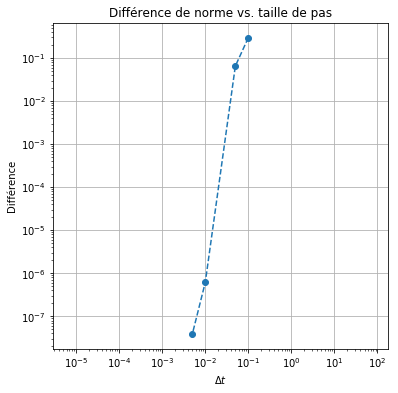

In [7]:
diffvalues = [] #on fait un graphique de la différence de normes par rapport à la taille de pas utilisée

for i, dt in enumerate(dtvalues[:-1]):
    diff = NormDifference(Solutions[i][:, 1], Solutions[-1][:, 1], dt)
    diffvalues.append(diff)
from matplotlib import pyplot
%matplotlib inline
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('Différence de norme vs. taille de pas')
pyplot.xlabel('$\Delta t$')  
pyplot.ylabel('Différence')
pyplot.grid()
pyplot.loglog(dtvalues[:-1], diffvalues,
              color='C0', linestyle='--', marker='o')
pyplot.axis('equal');

On voit donc que la différence augmente très rapidement avec le pas. Ceci implique que l'erreur dans cette méthode augmente très rapidement plus le pas est grand. Ceci représente bien la nature chaotique du double pendule.

Nous allons maintenant calculer l'ordre de convergence de cette application de Runge-Kutta, qui est donné par la formule suivante:

$$
\begin{equation}
p = \frac{\log \left(\frac{c-b}{b-a} \right) }{\log(ratio)}
\end{equation}
$$

Où c-b est la différence de norme entre une solution de pas intermédiaire et la solution de pas plus grand (donc moins précise), b-a est la différence de norme entre la même solution intermédiaire et la solution au pas plus petit.

In [8]:
ratio=2
step=0.001
newdtvalues= [step, ratio * step, ratio**2 * step] #on utilise des nouveaux pas calculés par rapport au pas le plus petit utilisé précedemment
NewSolutions=[]
for dt in newdtvalues:
    NewSolutions.append(PendulumValues(1,dt)) #on calcule des nouvelles solutions pour les nouveaux pas
BotDiff = NormDifference(NewSolutions[1][:, 1], NewSolutions[0][:, 1], newdtvalues[1]) #on calcule la différence de norme entre une solution de pas intermédiaire et celle de pas plus petit
TopDiff = NormDifference(NewSolutions[2][:, 1], NewSolutions[1][:, 1], newdtvalues[2]) #on calcule la différence de norme entre la solution de pas plus grand et celle de pas intermédiaire
p = math.log(TopDiff / BotDiff) / math.log(ratio) #on calcule p, l'ordre de convergence
print('Ordre de convergence de rk4 multivariable',p)

Ordre de convergence de rk4 multivariable 3.9945915030713155


Exercice 3

Nous devons ici faire une animation graphique du pendule double
(similaire à celle présentée sur la page wikipedia de référence). 
Nous allons créer quatres listes qui contiendront les coordonnées des extrémités des pendules en coordonnées carthésiennes
en réutilisant le code utilisé pour la question.
Nous allons ensuite utiliser la fonction animation, comme décrite dans le MOOC, en prenant comme paramètres
frames=20000 car nous avons 20000 éléments dans chaque liste et interval = 1
car chaque frame doit apparaitre 0.001 seconde pour que l'animation soit en temps réel

Using matplotlib backend: Qt5Agg


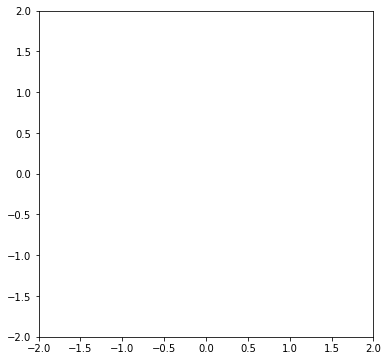

In [9]:
%matplotlib
import numpy as np
import matplotlib.pyplot as pyplot
import matplotlib.animation as animation
import math

outputpositionx1=[]
outputpositiony1=[]
outputpositionx2=[]
outputpositiony2=[]


time=0
nt=20000


    #les conditions initiales
angle_1=math.pi/2 #angle initial du premier pendule
angle_2=math.pi/2 #angle initial du second pendule
p_angle_1=0       #moment initial associé au premier angle
p_angle_2=0       #moment initial associé au second angle                                                                   
        
   

a=lambda angle_1, angle_2, p_angle_1, p_angle_2 : 6*(2*p_angle_1-3*math.cos(angle_1-angle_2)*p_angle_2)/(16-9*(math.cos(angle_1-angle_2))**2)
b=lambda angle_1, angle_2, p_angle_1, p_angle_2 : 6*(8*p_angle_2-3*math.cos(angle_1-angle_2)*p_angle_1)/(16-9*(math.cos(angle_1-angle_2))**2)
c=lambda angle_1, angle_2, p_angle_1, p_angle_2 : -(1/2)*((6*(2*p_angle_1-3*math.cos(angle_1-angle_2)*p_angle_2)/(16-9*(math.cos(angle_1-angle_2))**2))*(6*(8*p_angle_2-3*math.cos(angle_1-angle_2)*p_angle_1)/(16-9*(math.cos(angle_1-angle_2))**2))*math.sin(angle_1-angle_2)+3*(-9.81)*math.sin(angle_1))
d=lambda angle_1, angle_2, p_angle_1, p_angle_2 : (1/2)*((6*(2*p_angle_1-3*math.cos(angle_1-angle_2)*p_angle_2)/(16-9*(math.cos(angle_1-angle_2))**2))*(6*(8*p_angle_2-3*math.cos(angle_1-angle_2)*p_angle_1)/(16-9*(math.cos(angle_1-angle_2))**2))*math.sin(angle_1-angle_2)+9.81*math.sin(angle_2))

    
while time <= 20:
        
                                                               
    time=time+0.001
        
        #on calcule k1
    v=0.001*a(angle_1,angle_2,p_angle_1,p_angle_2)
    w=0.001*b(angle_1,angle_2,p_angle_1,p_angle_2)    
    x=0.001*c(angle_1,angle_2,p_angle_1,p_angle_2)
    y=0.001*d(angle_1,angle_2,p_angle_1,p_angle_2)    
        
        #on calcule k2
    e=0.001*a(angle_1+v/2, angle_2+w/2, p_angle_1+x/2,p_angle_2+y/2)
    f=0.001*b(angle_1+v/2, angle_2 + w/2, p_angle_1+x/2,p_angle_2+y/2)    
    g=0.001*c(angle_1+v/2, angle_2+w/2, p_angle_1+x/2,p_angle_2+y/2)
    h=0.001*d(angle_1+v/2, angle_2+w/2, p_angle_1+x/2,p_angle_2+y/2) 
        
        #on calcule k3
    m=0.001*a(angle_1+e/2, angle_2+f/2, p_angle_1+g/2,p_angle_2+h/2)
    n=0.001*b(angle_1+e/2, angle_2+f/2, p_angle_1+g/2,p_angle_2+h/2)    
    o=0.001*c(angle_1+e/2, angle_2+f/2, p_angle_1+g/2,p_angle_2+h/2)
    p=0.001*d(angle_1+e/2, angle_2+f/2, p_angle_1+g/2,p_angle_2+h/2) 
        
        #on calcule k4
    r=0.001*a(angle_1+m, angle_2+n, p_angle_1+o,p_angle_2+p)
    s=0.001*b(angle_1+m, angle_2+n, p_angle_1+o,p_angle_2+p)    
    t=0.001*c(angle_1+m, angle_2+n, p_angle_1+o,p_angle_2+p)
    u=0.001*d(angle_1+m, angle_2+n, p_angle_1+o,p_angle_2+p) 
        
    
    angle_1=angle_1+(1/6)*(v+2*e+2*m+r)
    angle_2=angle_2+(1/6)*(w+2*f+2*n+s)
    p_angle_1=p_angle_1+(1/6)*(x+2*g+2*o+t)
    p_angle_2=p_angle_2+(1/6)*(y+2*h+2*p+u)
        
    x1=np.sin(angle_1)
    y1=np.cos(angle_1)
    x2=np.sin(angle_2)
    truex2=x2+x1
    y2=np.cos(angle_2)
    truey2=y2+y1
    outputpositionx1.append(x1)
    outputpositiony1.append(y1)
    outputpositionx2.append(truex2)
    outputpositiony2.append(truey2)
        
     
    



fig = pyplot.figure(figsize=(6.0,6.0))

ax = pyplot.axes(xlim=(-2, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2) 
    

def init():
    line.set_data([], [])
    return line
  

def anime(i):
    x= [0,outputpositionx1[i],outputpositionx2[i]]
    y= [0,outputpositiony1[i],outputpositiony2[i]]
    
    line.set_data(x,y)
    return line
    
anim = animation.FuncAnimation(fig, anime, init_func=init, frames=20000, interval=1)
pyplot.show()

Sources:
https://www.myphysicslab.com/explain/runge-kutta-en.html
https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/?fbclid=IwAR1ADuApDb5WtNmVswlCFaDmOig9qIn8IE-NHHS9vOowt_buvWjC-CFIy_I